# McAndrew Saad - M2-W5 - Module Project

In [3]:
# importing the libriries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
#importing the csv file to a pandas dataframe
dataset = pd.read_csv('vgsales.csv')


### this graph below will show the platforms that are selling the most in terms of games purchased for the past few years, clearly, PS & Nintendo DS and WII are on top of the chart


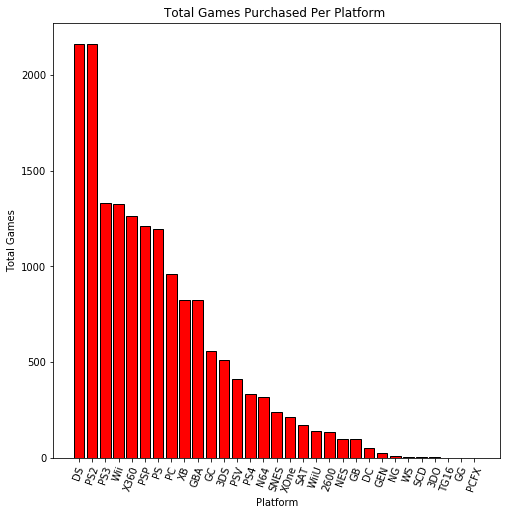

In [7]:
#visualizing the customers' preference in platform type usage
plt.figure(figsize=(8,8))
platformcount_data = dataset['Platform'].value_counts()
plt.bar(platformcount_data.index, platformcount_data.values , color = 'red', edgecolor = 'black')
plt.title('Total Games Purchased Per Platform ')
plt.xlabel('Platform')
plt.ylabel('Total Games')
plt.xticks(rotation = 70)
plt.show()


### this graph below showing the sales per genre of the games in millions USD, this tells us about the taste of our clients. Action games and Sports are on top of the chart while Adventure and Strategy have a very low income

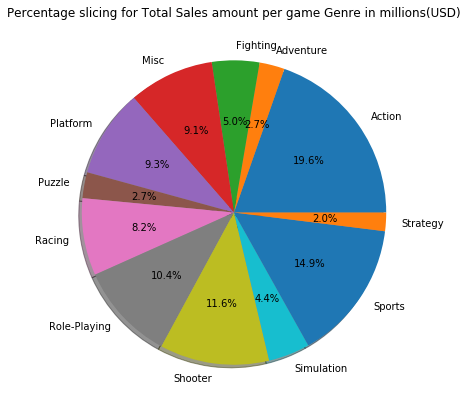

In [3]:
#pie chart for genre distribution
genre_data = dataset.groupby('Genre')['Global_Sales'].sum()
plt.figure(figsize=(7,7))
plt.pie(genre_data,labels = genre_data.index, autopct= '%.1f%%', shadow = True)
plt.title('Percentage slicing for Total Sales amount per game Genre in millions(USD)')
plt.show()


### there are 4 plots in the below graph, each is for the regional sales based on the genre of the game. North America sales are clearly on top of the charts 

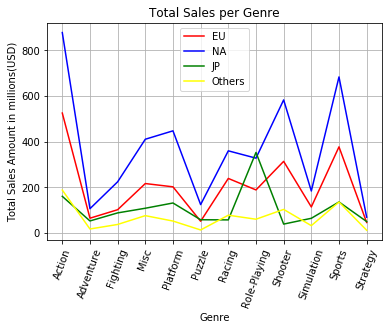

In [4]:
 #EU Sales/genre plot
eu_data = dataset.groupby('Genre')['EU_Sales'].sum()
plt.grid()
plt.plot(eu_data.index , eu_data.values , color = 'red' , label = 'EU')

#NA Sales/genre plot
na_data = dataset.groupby('Genre')['NA_Sales'].sum()
plt.plot(na_data.index , na_data.values , color = 'blue' , label = 'NA')

#Japan Sales/genre plot
jp_data = dataset.groupby('Genre')['JP_Sales'].sum()
plt.plot(jp_data.index , jp_data.values , color = 'green' , label = 'JP')

#other sales/genre plot
other_data = dataset.groupby('Genre')['Other_Sales'].sum()
plt.plot(other_data.index , other_data.values , color = 'yellow' , label = 'Others')

#showing the 4 plots
plt.xlabel('Genre')
plt.xticks(rotation = 70)
plt.ylabel('Total Sales Amount in millions(USD)')
plt.title('Total Sales per Genre')
plt.legend()
plt.show()



### there are 4 plots in the below graph, each is for the regional sales based on the platform of the game. Still, North America sales are clearly on top of the charts 


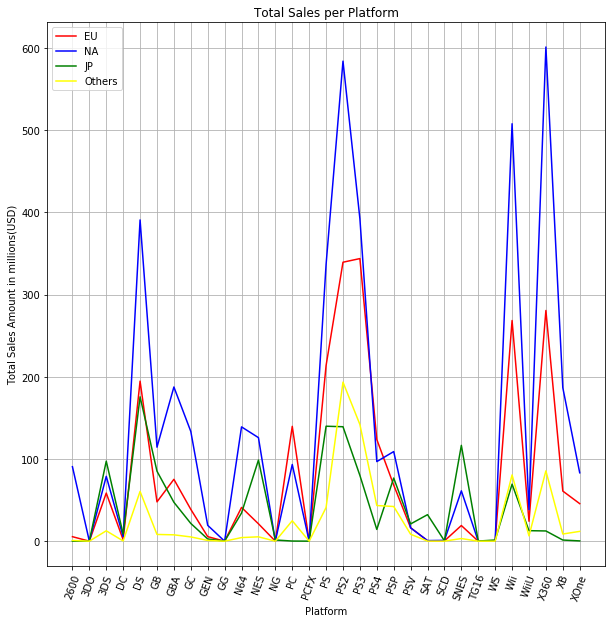

In [5]:

#EU Sales/Platform plot
plt.figure(figsize=(10,10))
eu_data2 = dataset.groupby('Platform')['EU_Sales'].sum()
plt.grid()
plt.plot(eu_data2.index , eu_data2.values , color = 'red' , label = 'EU')

#NA Sales/Platform  plot
na_data2 = dataset.groupby('Platform')['NA_Sales'].sum()
plt.plot(na_data2.index , na_data2.values , color = 'blue' , label = 'NA')

#Japan Sales/Platform  plot
jp_data2 = dataset.groupby('Platform')['JP_Sales'].sum()
plt.plot(jp_data2.index , jp_data2.values , color = 'green' , label = 'JP')

#other sales/Platform  plot
other_data2 = dataset.groupby('Platform')['Other_Sales'].sum()
plt.plot(other_data2.index , other_data2.values , color = 'yellow' , label = 'Others')

#showing the 4 plots

plt.xlabel('Platform')
plt.xticks(rotation = 70)
plt.ylabel('Total Sales Amount in millions(USD)')
plt.title('Total Sales per Platform')
plt.legend()
plt.show()


### this graph will show the global sales in millions USD based on the publisher of these games. Clearly Nintendo dominates the chart with global sales over the years

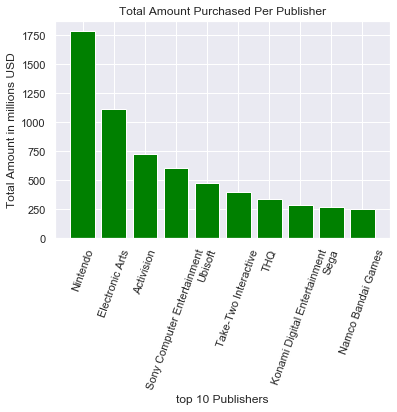

In [20]:
# graph for publishers vs sales
publisher_data = dataset.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.bar(publisher_data.index ,publisher_data.values , color = 'green' )
plt.title('Total Amount Purchased Per Publisher')
plt.xlabel('top 10 Publishers')
plt.ylabel('Total Amount in millions USD')
plt.xticks(rotation = 70)
plt.show()


### this graph below will show a positive correlation between columns that are affecting others. As we can see North American sales has contributed considerably to overall Global sales;hence we can see a positive correlation between the two.


Text(0.5, 1, 'Correlation Heatmap')

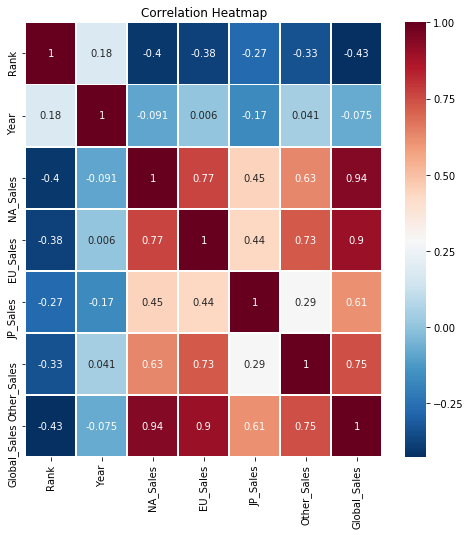

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr() , annot = True , cmap = 'RdBu_r' , linewidth = 0.7)
plt.title('Correlation Heatmap')


### this graph below will show the global sales in millions USD for the past few years based on the platform, PS is clearly leading the chart with the most income

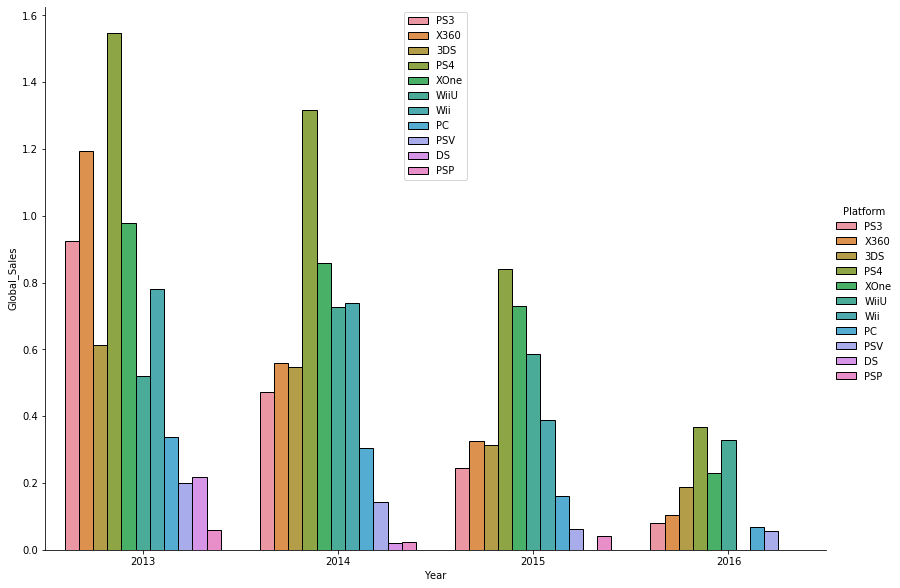

In [16]:
# platform vs global sales between 2012 and 2017
first_filter = dataset.Year>2012
second_filter = dataset.Year<2017
new_data = dataset[first_filter & second_filter]
new_data.Year = new_data.Year.astype(int)
sns.catplot(x = "Year", y = "Global_Sales", kind = "bar", hue = "Platform", data = new_data , edgecolor = 'black', height = 8.27, aspect = 11.7/8.27, ci = None)
plt.legend()
plt.show()

### two graphs below will show the total sales in millions USD and percentages for each group per regional sales. the lighter the color is, the higher the sales. basically I am creating a new dataframe with containing only the sales data and then adding to it the sales data in a percentage format. after this two heatmap subplots are created one for the sales in USD and one for sales in percentages

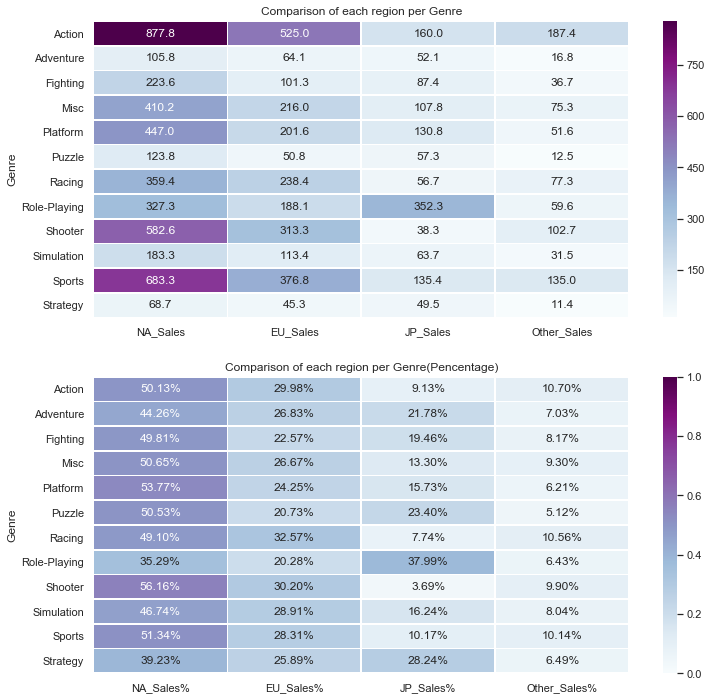

In [17]:
# heatmap graphs sales for all genres and percentrages
genre_group = dataset.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
genre_group['NA_Sales%'] = genre_group['NA_Sales'] / genre_group['Global_Sales']
genre_group['EU_Sales%'] = genre_group['EU_Sales'] / genre_group['Global_Sales']
genre_group['JP_Sales%'] = genre_group['JP_Sales'] / genre_group['Global_Sales']
genre_group['Other_Sales%'] = genre_group['Other_Sales'] / genre_group['Global_Sales']
plt.figure(figsize = (12, 12))
sns.set(font_scale = 1)
plt.subplot(211)
sns.heatmap(genre_group.loc[:, 'NA_Sales':'Other_Sales'] , annot = True , fmt = '.1f', cmap = 'BuPu' , linewidth = .7)
plt.title("Comparison of each region per Genre")
plt.subplot(212)
sns.heatmap(genre_group.loc[:,'NA_Sales%':'Other_Sales%'] , vmax = 1 , vmin = 0 , annot = True , fmt = '.2%' , cmap = 'BuPu' , linewidth = .7)
plt.title("Comparison of each region per Genre(Pencentage)")
plt.show()
